Line plot created successfully!
Data points: 30
X-axis (Dimensions): 2.00 to 1024.00
Y-axis (Time): 0.00 to 57460.00


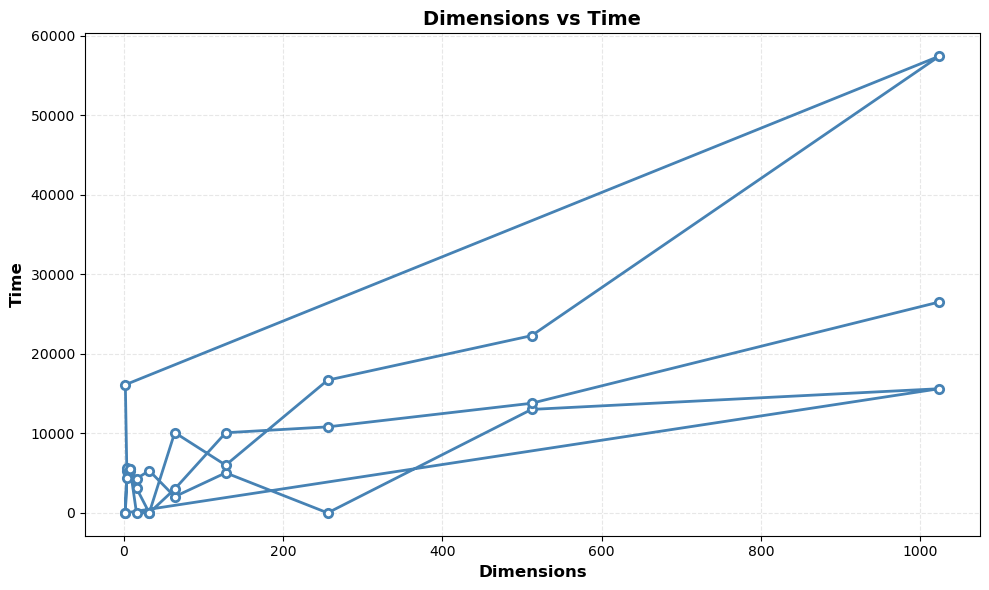

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def plot_line_graph(csv_file_path):
    """
    Read CSV file with numeric data and create a line plot of the first two columns
    
    Parameters:
    csv_file_path (str): Path to the CSV file
    """
    try:
        # Read the CSV file
        df = pd.read_csv(csv_file_path)
        
        # Verify we have at least 2 columns
        if df.shape[1] < 2:
            raise ValueError("CSV file must have at least 2 columns")
        
        # Get the first two columns
        x_data = df.iloc[:, 1]  # First column (X-axis)
        y_data = df.iloc[:, 2]  # Second column (Y-axis)
        
        # Get column names
        x_label = df.columns[1]
        y_label = df.columns[2]
        
        # Verify data is numeric
        if not (pd.api.types.is_numeric_dtype(x_data) and pd.api.types.is_numeric_dtype(y_data)):
            raise ValueError("First two columns must be numeric")
        
        # Create the line plot
        plt.figure(figsize=(10, 6))
        plt.plot(x_data, y_data, marker='o', linewidth=2, markersize=6, 
                color='steelblue', markerfacecolor='white', 
                markeredgecolor='steelblue', markeredgewidth=2)
        
        # Customize the plot
        plt.xlabel(x_label, fontsize=12, fontweight='bold')
        plt.ylabel(y_label, fontsize=12, fontweight='bold')
        plt.title(f'{x_label} vs {y_label}', fontsize=14, fontweight='bold')
        plt.grid(True, alpha=0.3, linestyle='--')
        
        # Improve layout
        plt.tight_layout()
        
        # Display basic statistics
        print(f"Line plot created successfully!")
        print(f"Data points: {len(df)}")
        print(f"X-axis ({x_label}): {x_data.min():.2f} to {x_data.max():.2f}")
        print(f"Y-axis ({y_label}): {y_data.min():.2f} to {y_data.max():.2f}")
        
        # Show the plot
        plt.show()
        
        return df
        
    except FileNotFoundError:
        print(f"Error: File '{csv_file_path}' not found.")
        return None
    except Exception as e:
        print(f"Error: {str(e)}")
        return None

# Example usage and sample data creation
if __name__ == "__main__":
    
    df = plot_line_graph('mean_based.csv')

✓ Plotted: mean_based.csv (100 points)
✓ Plotted: median_based.csv (110 points)
Unexpected error: 'str' object has no attribute 'columns'

Example usage:
# Plot multiple CSV files as scatter plots:
csv_files = ['file1.csv', 'file2.csv', 'file3.csv']
plot_multiple_csv_scatter_plots(csv_files)

# With custom labels:
labels = ['Experiment 1', 'Experiment 2', 'Control Group']
plot_multiple_csv_scatter_plots(csv_files, labels=labels)

# Plot single file:
plot_single_csv_scatter_plot('single_file.csv')


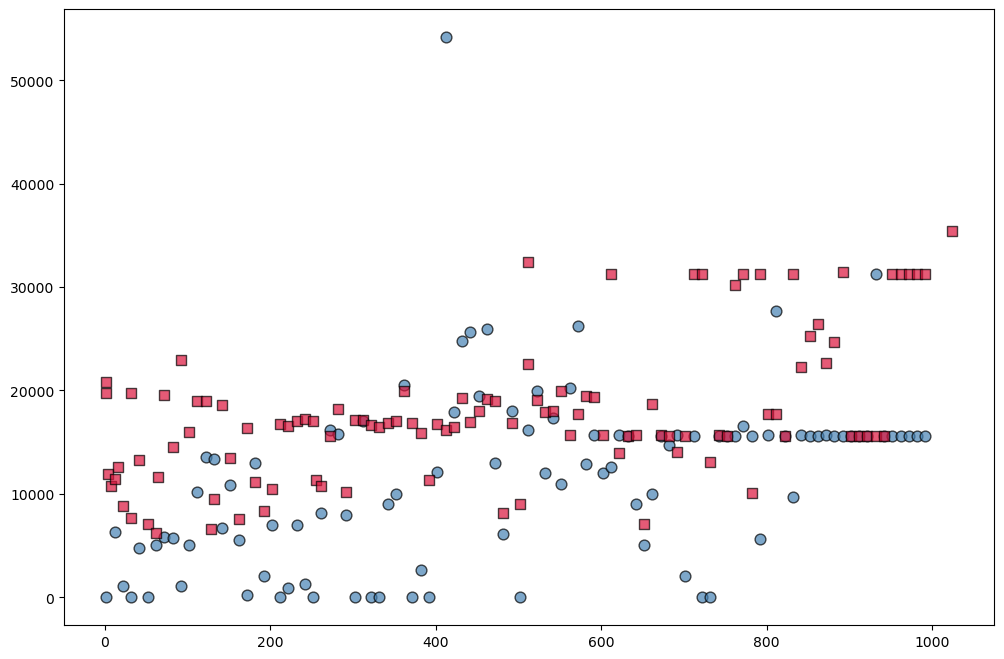

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_multiple_csv_line_graphs(csv_files, labels=None):

    try:
        # Define colors for different lines
        colors = ['steelblue', 'crimson', 'forestgreen', 'orange', 'purple', 'brown', 'pink', 'gray']
        markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p']
        
        plt.figure(figsize=(12, 8))
        
        all_dataframes = []
        
        for i, csv_file in enumerate(csv_files):
            try:
                # Read the CSV file
                df = pd.read_csv(csv_file)
                
                # Verify we have at least 2 columns
                if df.shape[1] < 2:
                    print(f"Warning: '{csv_file}' has less than 2 columns. Skipping.")
                    continue
                
                # Get the first two columns
                x_data = df.iloc[:, 1]
                y_data = df.iloc[:, 2]
                
                # Verify data is numeric
                if not (pd.api.types.is_numeric_dtype(x_data) and pd.api.types.is_numeric_dtype(y_data)):
                    print(f"Warning: First two columns in '{csv_file}' are not numeric. Skipping.")
                    continue
                
                # Determine label for this dataset
                if labels and i < len(labels):
                    label = labels[i]
                else:
                    label = csv_file.split('/')[-1].replace('.csv', '')  # Use filename without path and extension
                
                # Plot the line
                color = colors[i % len(colors)]
                marker = markers[i % len(markers)]
                
                # plt.plot(x_data, y_data, 
                #         marker=marker, linewidth=2, markersize=6,
                #         color=color, markerfacecolor='white',
                #         markeredgecolor=color, markeredgewidth=2,
                #         label=label, alpha=0.8)
                plt.scatter(x_data, y_data, 
                s=60, c=color, marker=marker,
                edgecolors='black', linewidth=1,
                label=label, alpha=0.7)
                all_dataframes.append((csv_file, df, df.columns[1], df.columns[2]))
                
                print(f"✓ Plotted: {csv_file} ({len(df)} points)")
                
            except FileNotFoundError:
                print(f"Error: File '{csv_file}' not found. Skipping.")
                continue
            except Exception as e:
                print(f"Error reading '{csv_file}': {str(e)}. Skipping.")
                continue
        
        if not all_dataframes:
            print("No valid data to plot!")
            return None
        
        # Use the first dataset's column names for axis labels
        first_df = all_dataframes[1][2]
        x_label = first_df.columns[1]
        y_label = first_df.columns[2]
        
        # Customize the plot
        plt.xlabel(x_label, fontsize=12, fontweight='bold')
        plt.ylabel(y_label, fontsize=12, fontweight='bold')
        plt.title('Multiple Dataset Comparison', fontsize=14, fontweight='bold')
        plt.grid(True, alpha=0.3, linestyle='--')
        plt.legend(loc='best', framealpha=0.9)
        
        # Improve layout
        plt.tight_layout()
        
        # Display summary statistics
        print("\n" + "="*60)
        print("MULTI-DATASET COMPARISON SUMMARY")
        print("="*60)
        
        for csv_file, df, x_col, y_col in all_dataframes:
            print(f"\nDataset: {csv_file}")
            print(f"  Points: {len(df)}")
            print(f"  {x_col}: {df.iloc[:, 0].min():.2f} to {df.iloc[:, 0].max():.2f}")
            print(f"  {y_col}: {df.iloc[:, 1].min():.2f} to {df.iloc[:, 1].max():.2f}")
        
        print("="*60)
        
        # Show the plot
        plt.show()
        
        return all_dataframes
        
    except Exception as e:
        print(f"Unexpected error: {str(e)}")
        return None


# Example usage
if __name__ == "__main__":
    
    csv_files = ['mean_based.csv', 'median_based.csv']
    custom_labels = ['mean_based ', 'median_based ']
    
    result = plot_multiple_csv_line_graphs(csv_files, labels=custom_labels)
    
    print("\nExample usage:")
    print("# Plot multiple CSV files as scatter plots:")
    print("csv_files = ['file1.csv', 'file2.csv', 'file3.csv']")
    print("plot_multiple_csv_scatter_plots(csv_files)")
    print()
    print("# With custom labels:")
    print("labels = ['Experiment 1', 'Experiment 2', 'Control Group']")
    print("plot_multiple_csv_scatter_plots(csv_files, labels=labels)")
    print()
    print("# Plot single file:")
    print("plot_single_csv_scatter_plot('single_file.csv')")

✓ Plotted: mean_based.csv (5 points)
✓ Plotted: median_based.csv (5 points)
Unexpected error: 'str' object has no attribute 'columns'

Example usage:
# Plot multiple CSV files as scatter plots:
csv_files = ['file1.csv', 'file2.csv', 'file3.csv']
plot_multiple_csv_scatter_plots(csv_files)

# With custom labels:
labels = ['Experiment 1', 'Experiment 2', 'Control Group']
plot_multiple_csv_scatter_plots(csv_files, labels=labels)

# Plot single file:
plot_single_csv_scatter_plot('single_file.csv')


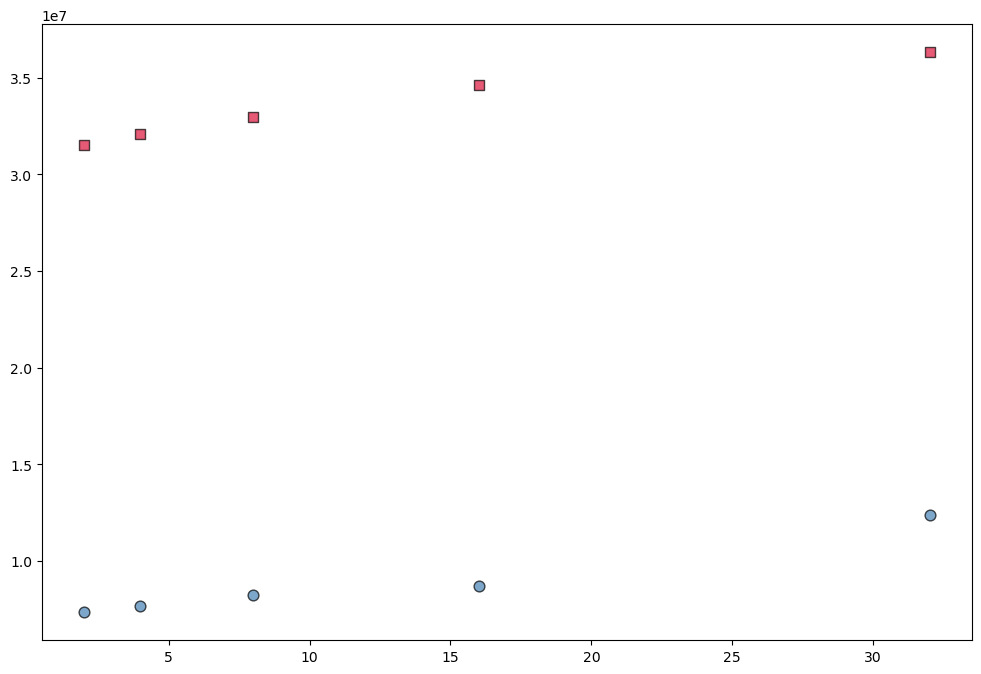

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_multiple_csv_line_graphs(csv_files, labels=None):

    try:
        # Define colors for different lines
        colors = ['steelblue', 'crimson', 'forestgreen', 'orange', 'purple', 'brown', 'pink', 'gray']
        markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p']
        
        plt.figure(figsize=(12, 8))
        
        all_dataframes = []
        
        for i, csv_file in enumerate(csv_files):
            try:
                # Read the CSV file
                df = pd.read_csv(csv_file)
                
                # Verify we have at least 2 columns
                if df.shape[1] < 2:
                    print(f"Warning: '{csv_file}' has less than 2 columns. Skipping.")
                    continue
                
                # Get the first two columns
                x_data = df.iloc[:, 1]
                y_data = df.iloc[:, 2]
                
                # Verify data is numeric
                if not (pd.api.types.is_numeric_dtype(x_data) and pd.api.types.is_numeric_dtype(y_data)):
                    print(f"Warning: First two columns in '{csv_file}' are not numeric. Skipping.")
                    continue
                
                # Determine label for this dataset
                if labels and i < len(labels):
                    label = labels[i]
                else:
                    label = csv_file.split('/')[-1].replace('.csv', '')  # Use filename without path and extension
                
                # Plot the line
                color = colors[i % len(colors)]
                marker = markers[i % len(markers)]
                
                # plt.plot(x_data, y_data, 
                #         marker=marker, linewidth=2, markersize=6,
                #         color=color, markerfacecolor='white',
                #         markeredgecolor=color, markeredgewidth=2,
                #         label=label, alpha=0.8)
                plt.scatter(x_data, y_data, 
                s=60, c=color, marker=marker,
                edgecolors='black', linewidth=1,
                label=label, alpha=0.7)
                all_dataframes.append((csv_file, df, df.columns[1], df.columns[2]))
                
                print(f"✓ Plotted: {csv_file} ({len(df)} points)")
                
            except FileNotFoundError:
                print(f"Error: File '{csv_file}' not found. Skipping.")
                continue
            except Exception as e:
                print(f"Error reading '{csv_file}': {str(e)}. Skipping.")
                continue
        
        if not all_dataframes:
            print("No valid data to plot!")
            return None
        
        # Use the first dataset's column names for axis labels
        first_df = all_dataframes[1][2]
        x_label = first_df.columns[1]
        y_label = first_df.columns[2]
        
        # Customize the plot
        plt.xlabel(x_label, fontsize=12, fontweight='bold')
        plt.ylabel(y_label, fontsize=12, fontweight='bold')
        plt.title('Multiple Dataset Comparison', fontsize=14, fontweight='bold')
        plt.grid(True, alpha=0.3, linestyle='--')
        plt.legend(loc='best', framealpha=0.9)
        
        # Improve layout
        plt.tight_layout()
        
        # Display summary statistics
        print("\n" + "="*60)
        print("MULTI-DATASET COMPARISON SUMMARY")
        print("="*60)
        
        for csv_file, df, x_col, y_col in all_dataframes:
            print(f"\nDataset: {csv_file}")
            print(f"  Points: {len(df)}")
            print(f"  {x_col}: {df.iloc[:, 0].min():.2f} to {df.iloc[:, 0].max():.2f}")
            print(f"  {y_col}: {df.iloc[:, 1].min():.2f} to {df.iloc[:, 1].max():.2f}")
        
        print("="*60)
        
        # Show the plot
        plt.show()
        
        return all_dataframes
        
    except Exception as e:
        print(f"Unexpected error: {str(e)}")
        return None


# Example usage
if __name__ == "__main__":
    
    csv_files = ['mean_based.csv', 'median_based.csv']
    custom_labels = ['mean_based ', 'median_based ']
    
    result = plot_multiple_csv_line_graphs(csv_files, labels=custom_labels)
    
    print("\nExample usage:")
    print("# Plot multiple CSV files as scatter plots:")
    print("csv_files = ['file1.csv', 'file2.csv', 'file3.csv']")
    print("plot_multiple_csv_scatter_plots(csv_files)")
    print()
    print("# With custom labels:")
    print("labels = ['Experiment 1', 'Experiment 2', 'Control Group']")
    print("plot_multiple_csv_scatter_plots(csv_files, labels=labels)")
    print()
    print("# Plot single file:")
    print("plot_single_csv_scatter_plot('single_file.csv')")

Sample CSV files created!

1. Plotting grouped data with standard deviation error bars:
Grouped 50 points into 5 groups


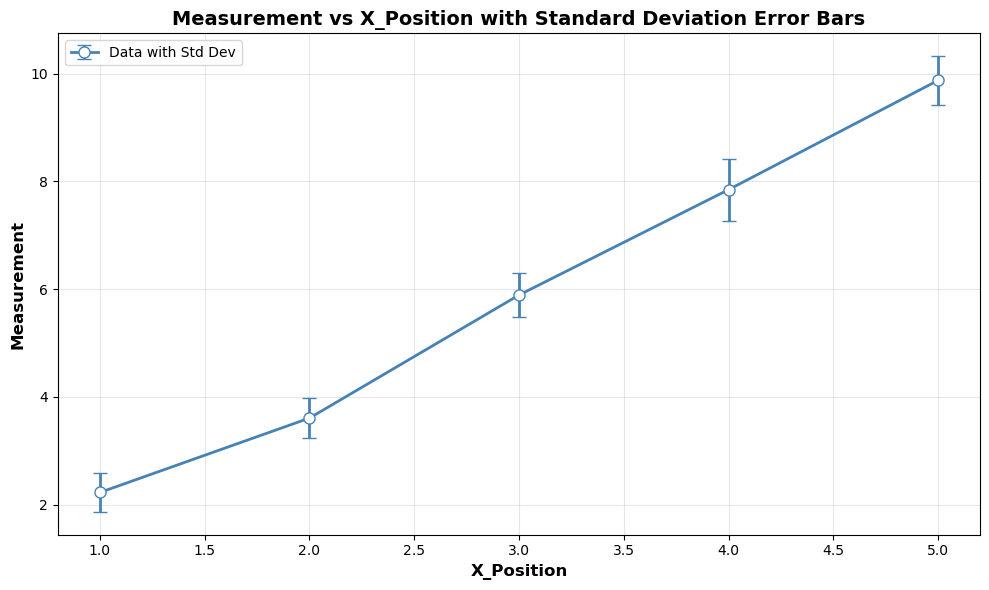


2. Plotting with custom error column:


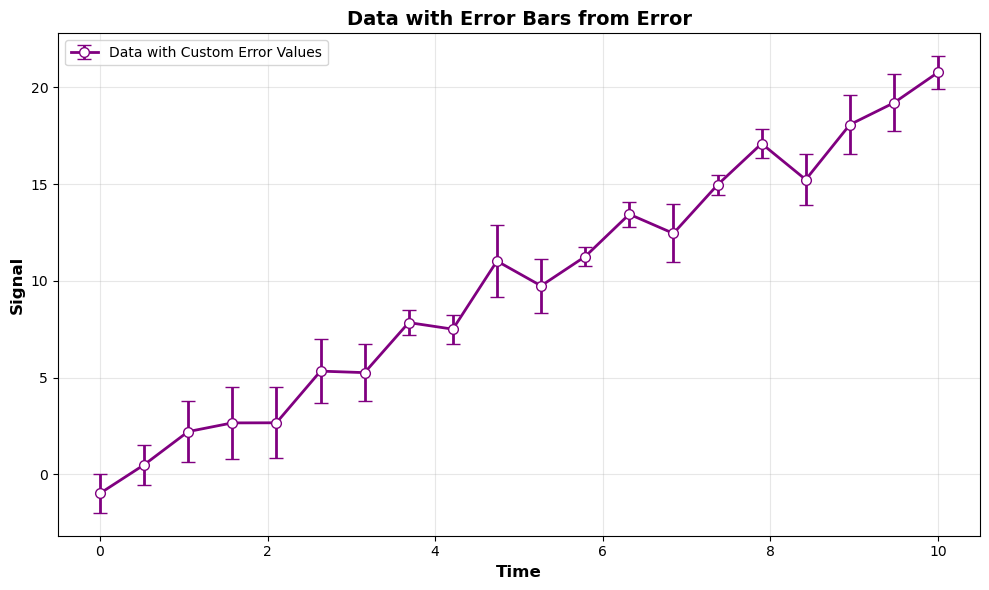

Used column 'Error' as error values

3. Plotting with rolling standard deviation:


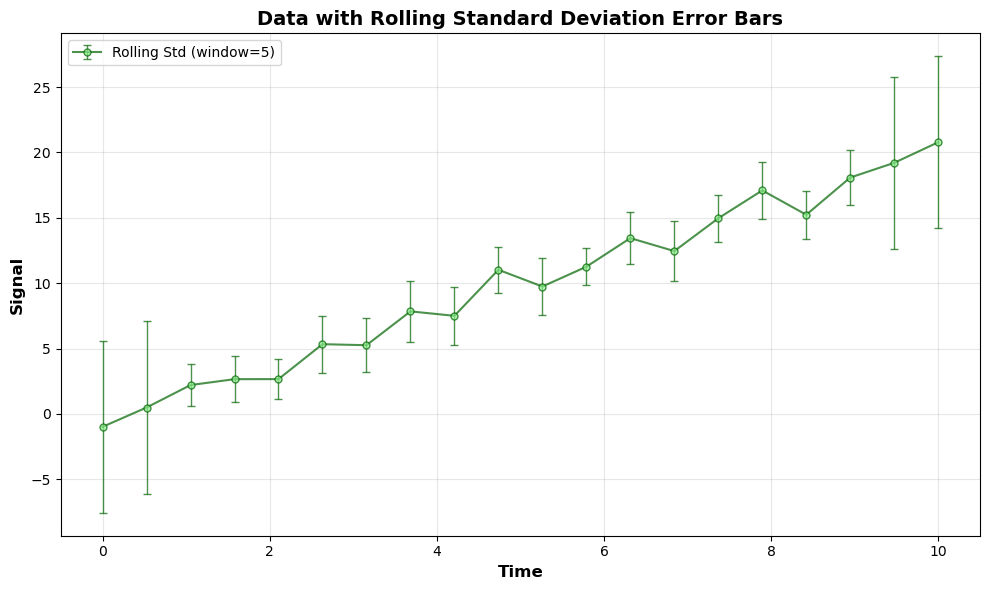


4. Multiple series comparison:


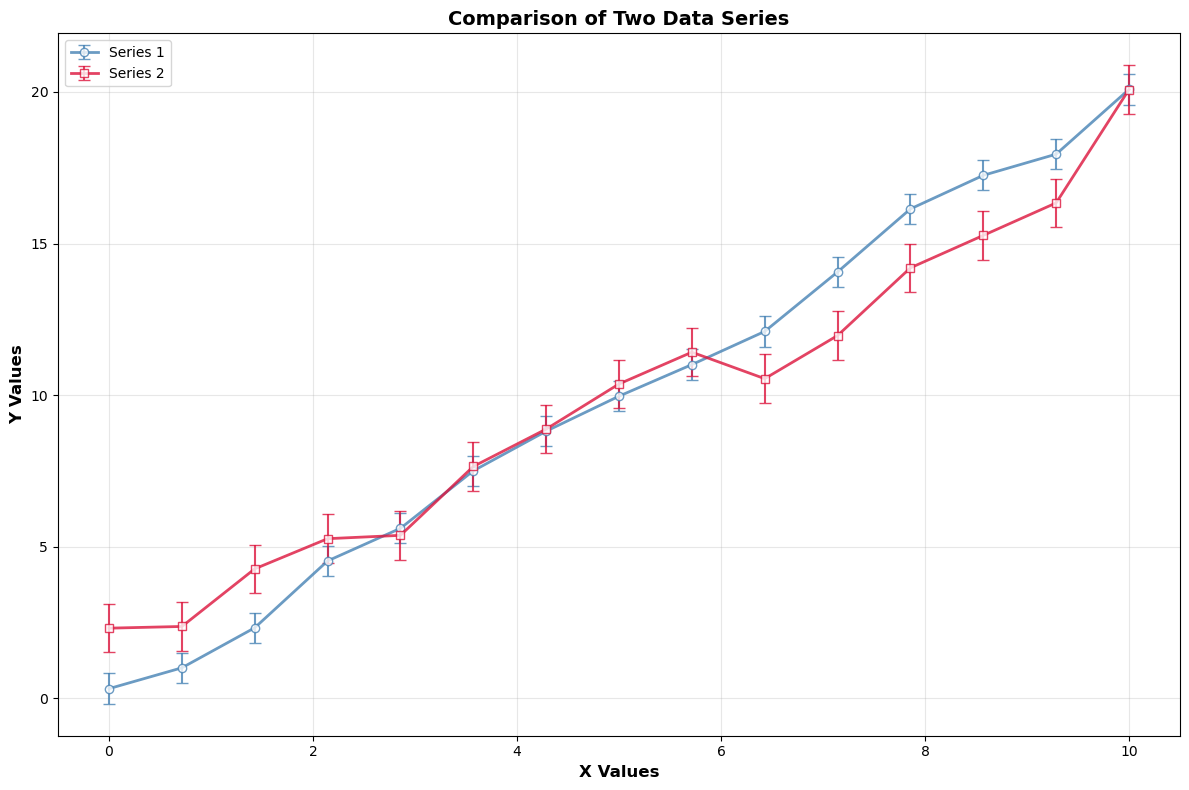


Usage examples:
# Basic usage with grouping:
plot_with_std_error_bars('your_file.csv')

# Use specific column as errors:
plot_csv_with_custom_errors('your_file.csv', error_column=2)

# Rolling standard deviation:
calculate_rolling_std_error_bars('your_file.csv', window_size=5)


In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
def plot_with_std_error_bars(csv_file_path, x_col=0, y_col=1, group_by_x=True):
    """
    Plot data with standard deviation error bars
    
    Parameters:
    csv_file_path (str): Path to CSV file
    x_col (int): Column index for x-axis (default: 0)
    y_col (int): Column index for y-axis (default: 1) 
    group_by_x (bool): If True, groups by x values and calculates std for each group
    """
    try:
        # Read CSV file
        df = pd.read_csv(csv_file_path)
        
        if df.shape[1] < 2:
            raise ValueError("CSV must have at least 2 columns")
        
        x_data = df.iloc[:, x_col]
        y_data = df.iloc[:, y_col]
        x_label = df.columns[x_col]
        y_label = df.columns[y_col]
        
        plt.figure(figsize=(10, 6))
        
        if group_by_x:
            # Group by x values and calculate mean and std for each group
            grouped = df.groupby(df.iloc[:, x_col])[df.columns[y_col]]
            x_grouped = grouped.mean().index
            y_mean = grouped.mean().values
            y_std = grouped.std().values
            
            # Handle NaN values (when group has only one value, std is NaN)
            y_std = np.nan_to_num(y_std, nan=0.0)
            
            plt.errorbar(x_grouped, y_mean, yerr=y_std, 
                        marker='o', markersize=8, capsize=5, capthick=2,
                        linewidth=2, elinewidth=2, markeredgewidth=1,
                        color='steelblue', markerfacecolor='white',
                        markeredgecolor='steelblue', label='Data with Std Dev')
            
            print(f"Grouped {len(df)} points into {len(x_grouped)} groups")
            
        else:
            # Calculate rolling standard deviation or use a constant std
            y_std = np.full(len(y_data), y_data.std())  # Use overall std for all points
            
            plt.errorbar(x_data, y_data, yerr=y_std,
                        fmt='o', markersize=6, capsize=4, capthick=1,
                        elinewidth=1.5, markeredgewidth=1,
                        color='steelblue', markerfacecolor='white',
                        markeredgecolor='steelblue', alpha=0.7,
                        label='Data with Overall Std Dev')
        
        plt.xlabel(x_label, fontsize=12, fontweight='bold')
        plt.ylabel(y_label, fontsize=12, fontweight='bold')
        plt.title(f'{y_label} vs {x_label} with Standard Deviation Error Bars', 
                 fontsize=14, fontweight='bold')
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.tight_layout()
        plt.show()
        
        return df
        
    except Exception as e:
        print(f"Error: {e}")
        return None

def plot_multiple_series_with_error_bars(x_data, y_data_list, y_errors_list, labels, title=""):
    """
    Plot multiple data series with individual error bars
    
    Parameters:
    x_data: Common x-axis data
    y_data_list: List of y-data arrays
    y_errors_list: List of error arrays (standard deviations)
    labels: List of labels for each series
    title: Plot title
    """
    colors = ['steelblue', 'crimson', 'forestgreen', 'orange', 'purple']
    markers = ['o', 's', '^', 'D', 'v']
    
    plt.figure(figsize=(12, 8))
    
    for i, (y_data, y_errors, label) in enumerate(zip(y_data_list, y_errors_list, labels)):
        color = colors[i % len(colors)]
        marker = markers[i % len(markers)]
        
        plt.errorbar(x_data, y_data, yerr=y_errors,
                    marker=marker, markersize=6, capsize=4, capthick=1.5,
                    linewidth=2, elinewidth=1.5, markeredgewidth=1,
                    color=color, markerfacecolor='white',
                    markeredgecolor=color, label=label, alpha=0.8)
    
    plt.xlabel('X Values', fontsize=12, fontweight='bold')
    plt.ylabel('Y Values', fontsize=12, fontweight='bold')
    plt.title(title or 'Multiple Series with Error Bars', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

def calculate_rolling_std_error_bars(csv_file_path, window_size=5):
    """
    Plot with rolling standard deviation as error bars
    """
    try:
        df = pd.read_csv(csv_file_path)
        x_data = df.iloc[:, 0]
        y_data = df.iloc[:, 1]
        
        # Calculate rolling standard deviation
        y_rolling_std = y_data.rolling(window=window_size, center=True).std()
        y_rolling_std = y_rolling_std.fillna(y_data.std())  # Fill NaN with overall std
        
        plt.figure(figsize=(10, 6))
        plt.errorbar(x_data, y_data, yerr=y_rolling_std,
                    marker='o', markersize=5, capsize=3, capthick=1,
                    linewidth=1.5, elinewidth=1, alpha=0.7,
                    color='darkgreen', markerfacecolor='lightgreen',
                    markeredgecolor='darkgreen',
                    label=f'Rolling Std (window={window_size})')
        
        plt.xlabel(df.columns[0], fontsize=12, fontweight='bold')
        plt.ylabel(df.columns[1], fontsize=12, fontweight='bold')
        plt.title('Data with Rolling Standard Deviation Error Bars', fontsize=14, fontweight='bold')
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.tight_layout()
        plt.show()
        
        return df
        
    except Exception as e:
        print(f"Error: {e}")
        return None

def plot_csv_with_custom_errors(csv_file_path, error_column=2):
    """
    Plot using a specific column as error values
    
    Parameters:
    csv_file_path (str): Path to CSV file
    error_column (int): Column index containing error values (default: 2, third column)
    """
    try:
        df = pd.read_csv(csv_file_path)
        
        if df.shape[1] < 3:
            raise ValueError("CSV must have at least 3 columns (x, y, error)")
        
        x_data = df.iloc[:, 0]
        y_data = df.iloc[:, 1]
        errors = df.iloc[:, error_column]
        
        plt.figure(figsize=(10, 6))
        plt.errorbar(x_data, y_data, yerr=errors,
                    marker='o', markersize=7, capsize=5, capthick=2,
                    linewidth=2, elinewidth=2, markeredgewidth=1,
                    color='purple', markerfacecolor='white',
                    markeredgecolor='purple',
                    label='Data with Custom Error Values')
        
        plt.xlabel(df.columns[0], fontsize=12, fontweight='bold')
        plt.ylabel(df.columns[1], fontsize=12, fontweight='bold')
        plt.title(f'Data with Error Bars from {df.columns[error_column]}', 
                 fontsize=14, fontweight='bold')
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.tight_layout()
        plt.show()
        
        print(f"Used column '{df.columns[error_column]}' as error values")
        return df
        
    except Exception as e:
        print(f"Error: {e}")
        return None

# Example usage and demonstration
if __name__ == "__main__":
    # Create sample data with different scenarios
    np.random.seed(42)
    
    # Scenario 1: Data with repeated x values (good for grouping)
    x_repeated = np.repeat([1, 2, 3, 4, 5], 10)  # Each x value repeated 10 times
    y_repeated = []
    for x in x_repeated:
        y_repeated.append(2*x + np.random.normal(0, 0.5))  # Different noise for each point
    
    df1 = pd.DataFrame({
        'X_Position': x_repeated,
        'Measurement': y_repeated,
        'Temperature': np.random.uniform(20, 30, len(x_repeated)),
        'Pressure': np.random.uniform(100, 110, len(x_repeated))
    })
    df1.to_csv('repeated_measurements.csv', index=False)
    # print(df1)
    # Scenario 2: Data with explicit error column
    x_simple = np.linspace(0, 10, 20)
    y_simple = 2*x_simple + np.random.normal(0, 1, 20)
    errors_simple = np.random.uniform(0.5, 2.0, 20)  # Random error values
    
    df2 = pd.DataFrame({
        'Time': x_simple,
        'Signal': y_simple,
        'Error': errors_simple,
        'Quality': np.random.uniform(0.8, 1.0, 20)
    })
    df2.to_csv('data_with_errors.csv', index=False)
    
    print("Sample CSV files created!")
    print("\n1. Plotting grouped data with standard deviation error bars:")
    plot_with_std_error_bars('repeated_measurements.csv', group_by_x=True)
    
    print("\n2. Plotting with custom error column:")
    plot_csv_with_custom_errors('data_with_errors.csv', error_column=2)
    
    print("\n3. Plotting with rolling standard deviation:")
    calculate_rolling_std_error_bars('data_with_errors.csv', window_size=5)
    
    print("\n4. Multiple series comparison:")
    x = np.linspace(0, 10, 15)
    y1 = 2*x + np.random.normal(0, 0.5, 15)
    y2 = 1.5*x + 2 + np.random.normal(0, 0.8, 15)
    err1 = np.full(15, 0.5)  # Constant error
    err2 = np.full(15, 0.8)  # Different constant error
    
    plot_multiple_series_with_error_bars(x, [y1, y2], [err1, err2], 
                                       ['Series 1', 'Series 2'],
                                       'Comparison of Two Data Series')
    
    print("\nUsage examples:")
    print("# Basic usage with grouping:")
    print("plot_with_std_error_bars('your_file.csv')")
    print()
    print("# Use specific column as errors:")  
    print("plot_csv_with_custom_errors('your_file.csv', error_column=2)")
    print()
    print("# Rolling standard deviation:")
    print("calculate_rolling_std_error_bars('your_file.csv', window_size=5)")